# Mini Projet : Intro ML

**Problèmatique** : *Récupération d'un dataset sur les series et films netflix et analyse de ce dataset*

In [1]:
#importer des librairies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn as sk;
import matplotlib as mat
import seaborn as sns
import math
import scipy

## 1) Analyse graphique des données (Dataviz)

---------------------------------------------------------------------------------------------------------------------------

### 1) Import du dataset et cleaning 

In [2]:
films = pd.read_csv("netflix_titles.csv") #,sep=';',decimal=','
#https://www.kaggle.com/shivamb/netflix-shows

In [3]:
#films.drop(['Unnamed: 0'], axis='columns', inplace = True)
films.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
films.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6225,70153412,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,70243132,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,80005756,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [5]:
films.shape

(6234, 12)

In [6]:
films.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
films.drop(['director'], axis='columns', inplace = True)

In [8]:
films

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


---------------------------------------------------------------------------------------------------------------------------

#### 1.1) Diagrammes de répartition des données (type gaussienne sur les données) 

Affichage du premier graphe, representant le nombre de films/ series par durée en minutes

In [9]:
cond = films[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex =True)).any(axis =1)
graph1 = films[~cond]
graph1.index = np.arange(len(graph3))
lst1 =[]
for i in graph1.duration:
    if i[2]=='m':
        lst1.append(int(i[:2]))
    else:
        lst1.append(int(i[:3]))
graph3['Duree'] = lst1    

NameError: name 'graph3' is not defined

Forme de l'histogramme et nom des axes

In [ ]:
plt.plot(figsize =(20,6))
plt.xlabel('x - Duree')
plt.ylabel('y - Nombre de films/series')
sns.distplot(graph3.Duree,kde =False)
plt.title('Nombre de films/series par duree en minutes')

---------------------------------------------------------------------------------------------------------------------------

#### 1.2) Vérification du nombre de données, si plusieurs données sont peu représentés (<3%) alors regrouper dans une seule et même catégorie, 1 pie chart avant/apres 

**Diagramme de répartition entre films et séries**

In [128]:
films.type.value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

**Diagramme de répartition des films et séries par pays**

In [160]:
films.country.value_counts()

United States                                                 2032
India                                                          777
United Kingdom                                                 348
Japan                                                          176
Canada                                                         141
                                                              ... 
Germany, France, Luxembourg, United Kingdom, United States       1
France, Morocco                                                  1
United States, Australia, Mexico                                 1
France, United States, Mexico                                    1
Bulgaria, United States, Spain, Canada                           1
Name: country, Length: 554, dtype: int64

Text(0.5, 1.0, 'Proportion de films et series sur Netflix')

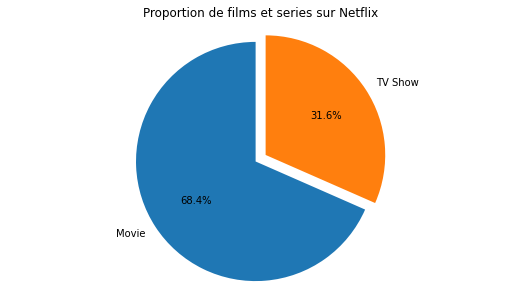

In [161]:
type_diag=films.type.value_counts()/films.type.value_counts().sum()
#pays_diag=films.country.value_counts()/films.country.value_counts().sum()

fig =plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax1.pie(x=type_diag, explode=(0,0.1), labels=['Movie','TV Show'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title("Proportion de films et series sur Netflix")


---------------------------------------------------------------------------------------------------------------------------

#### 1.3) Nettoyage des données manquantes, encodage (OneHot, dictionnaire ou Sklearn Encoder) 

In [176]:
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

Encodage *one-hot* pour les types (series/films) 

In [177]:
X = np.asarray([ ["Movie"], ["TV Show"]])
# Création de l'objet Label Encoder
label_encoder = LabelEncoder()
X_labels = label_encoder.fit_transform(X)
print("Classes :", label_encoder.classes_)
print("Encodage par labels :", X_labels)
# Redimensionnement matriciel
X_labels = X_labels.reshape(len(X_labels), 1)
# Objet One Hot Encoder
one_hot_encoder = OneHotEncoder(sparse=False)
print("Encodage one-hot :")
print(one_hot_encoder.fit_transform(X_labels))

Classes : ['Movie' 'TV Show']
Encodage par labels : [0 1]
Encodage one-hot :
[[1. 0.]
 [0. 1.]]


c:\users\bapti\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [178]:
X

array([['Movie'],
       ['TV Show']], dtype='<U7')

---------------------------------------------------------------------------------------------------------------------------

#### 1.4) Boites à moustache avec données extrêmes  (Box Plot)

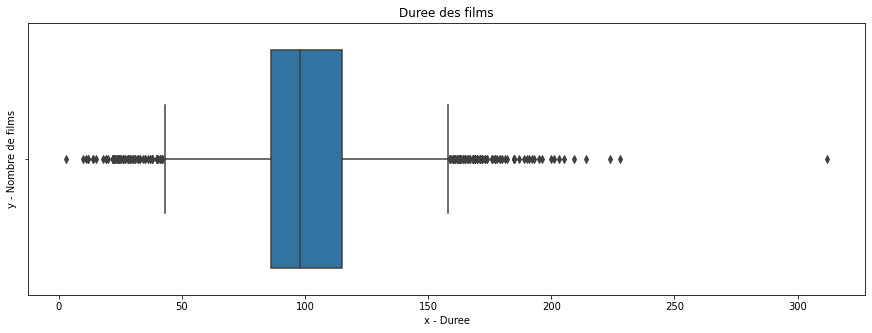

In [270]:
plt.figure(figsize =(15,5))
sns.boxplot(x = query3.duration_)
plt.title('Duree des films')
plt.xlabel('x - Duree')
plt.ylabel('y - Nombre de films')
plt.show()

Cette boite à moustache montre qu'une grande quantitée des films dure entre 80 et 120min . Cela montre le profil statistique de ce dataset

---------------------------------------------------------------------------------------------------------------------------

#### 1.5) Heatmap + observations sur les corrélations

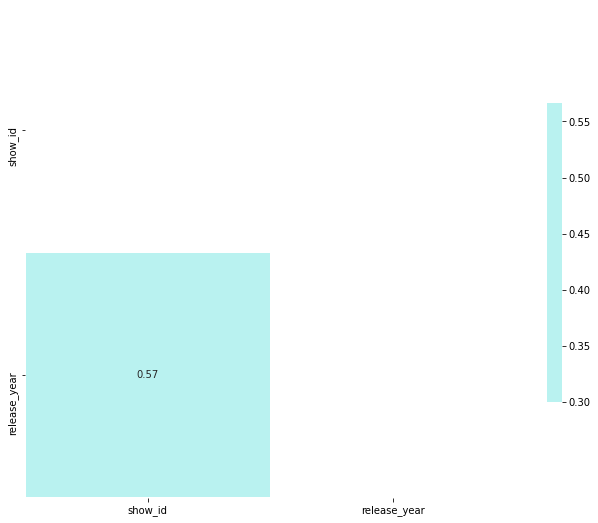

In [287]:
data_corr=pd.DataFrame(films,columns=['show_id','release_year'])

corr=data_corr.corr()
corr_map=sea.color_palette("pastel",as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(corr, mask=mask, cmap=corr_map, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**Commentaire :** le dataset est peut etre mal choisi car la corrélation n'est pas pertinante et je n'ai que 2 categories avec des valeurs numérique exploitables

---------------------------------------------------------------------------------------------------------------------------

## 2) Model Building 

---------------------------------------------------------------------------------------------------------------------------

#### 2.1) 2 algorithmes avec 2 paramètres différents (ex: max_depth, n_estimators,….) que vous expliquerez en commentaire 

1) Algorithme permettant de gérer des problèmes de classification à plusieurs classes

In [292]:
for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

NameError: name 'y_train' is not defined

2) Algorithme de régresseur de vote par prédiction pour les estimateurs non ajustés.

In [294]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
X = np.array([[1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36]])
y = np.array([2, 6, 12, 20, 30, 42])
er = VotingRegressor([('lr', r1), ('rf', r2)])
print(er.fit(X, y).predict(X))

[ 3.3  5.7 11.8 19.7 28.  40.3]


---------------------------------------------------------------------------------------------------------------------------

#### 2.2) Affichage des coefficients/ accuracy 

TO DO:
remplacer movie et tv show par un code (1 et 2) pour pouvoir calculer la correlartion entre la duree et le type
creation d'une nouvelle colonne type categ (1=Movie, 2=TV Show)

In [233]:
#définir 2 variables de travail

X=films['type']
Y=films['duration']

#X=films['show_id']
#Y=films['release_year']

In [234]:
X.head()

show_id
81145628    81145628
80117401    80117401
70234439    70234439
80058654    80058654
80125979    80125979
Name: show_id, dtype: int64

In [235]:
Y.head()

show_id
81145628    2019
80117401    2016
70234439    2013
80058654    2016
80125979    2017
Name: release_year, dtype: int64

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [238]:
X_train

show_id
81209203    81209203
80095718    80095718
70298116    70298116
81047899    81047899
70143836    70143836
              ...   
80044834    80044834
80097466    80097466
80227113    80227113
70222859    70222859
81012402    81012402
Name: show_id, Length: 4363, dtype: int64

In [239]:
len(X_test)

1871

In [241]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [242]:
lin_model.fit(X_train, Y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[81209203 80095718 70298116 ... 80227113 70222859 81012402].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [243]:
lin_model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [244]:
Y_test

show_id
81025317    2014
80184422    2016
80232914    2018
80106137    2015
81076114    2019
            ... 
80163366    2016
60033107    2004
81026192    2017
80176819    2015
80140362    2011
Name: release_year, Length: 1871, dtype: int64

In [247]:
lin_model.score(X_test, Y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

---------------------------------------------------------------------------------------------------------------------------

## 3) Feature Importance

#### 3.1) Affichage sous forme de barplot

On cherche à afficher la répartition des séries par pays

In [2]:
req1 = films.title.groupby([films.type,films.country]).count()

NameError: name 'films' is not defined

<AxesSubplot:title={'center':'Pays avec le plus de series'}, ylabel='country'>

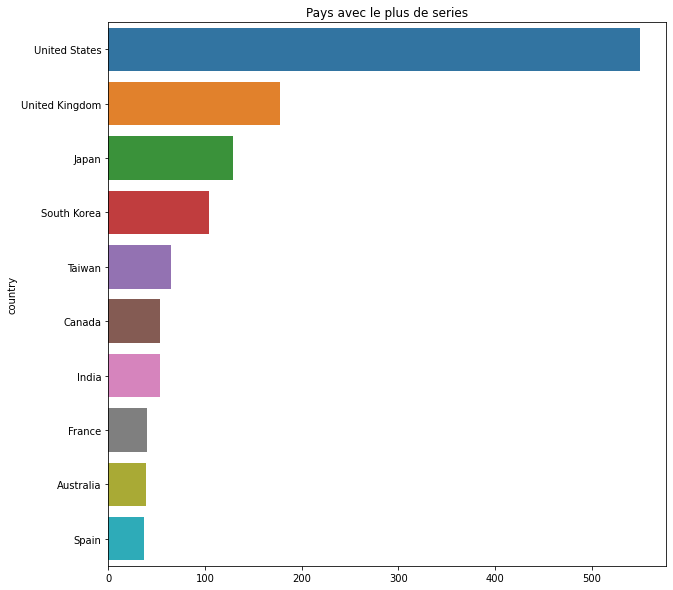

In [253]:
req6 = req1[('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Pays avec le plus de series')
sns.barplot(y = req6.index,x = req6.values)

Idem pour les films

In [1]:
req6 = req1[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Pays produisant le plus grand nombre de films')
sns.barplot(y = req6.index,x = req6.values)

NameError: name 'req1' is not defined

---------------------------------------------------------------------------------------------------------------------------

#### 3.2) Autre forme d’affichage si vous avez le temps  

**Bonus : Affichage sour forme d'un arbre de regression** / test avec un dataset random car pas de valeurs pour tester ça avec mon dataset

In [227]:
# le random dataset
rng = np.random.RandomState(1)
X = np.sort(10 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# le bruit ajouté 
y[::5] += 3 * (0.5 - rng.rand(16))

In [228]:
regressors = []
depths = [1, 2, 3, 4]
X_test = np.arange(0.0, 10.0, 0.1)[:, np.newaxis]
Y_test = []
for p in depths:
    reg = DecisionTreeRegressor(max_depth=p)  # Création d'un arbre de régression de profondeur p
    reg.fit(X, y)  # Processus d'optimisation de l'arbre
    Y_test.append(reg.predict(X_test))  # On prédit sur les données et on ajoute à la liste des valeurs prédites
    regressors.append(reg)

In [229]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import graphviz 
dot_data = tree.export_graphviz(regressors[0], out_file=None) 
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

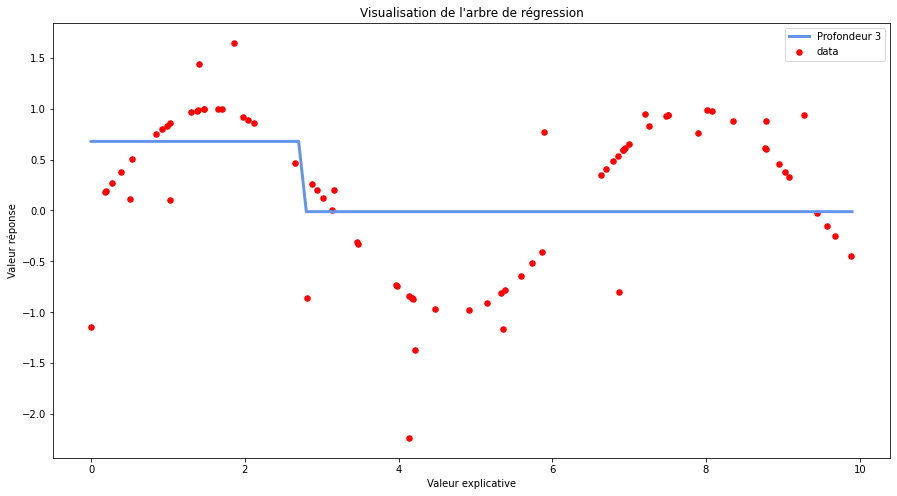

In [231]:
plt.figure(figsize=(15, 8))
plt.plot(X_test, Y_test[0], color="cornflowerblue", label="Profondeur 3", linewidth=3)
plt.scatter(X, y, s=30, c="red", label="data")
plt.xlabel("Valeur explicative")
plt.ylabel("Valeur réponse")
plt.title("Visualisation de l'arbre de régression")
plt.legend()
    
plt.show()

---------------------------------------------------------------------------------------------------------------------------

## 4) Model Réexécution avec les features sélectionnés 

#### 4.1) Affichage des metrics standard et commentaire sur la pertinence 

Score de precision moyen

In [288]:
import numpy as np
from sklearn.metrics import average_precision_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
average_precision_score(y_true, y_scores)

0.8333333333333333

Score de précision équilibré

In [290]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)

0.625

(voir données du dataset NBA pour plus de pertinence)
Mes données ne permettent pas de determiner si elles sont pertinances, si mon score de precision avait était autour ou supérieur à 0.625 on peut dire que les données sont pertinantes

---------------------------------------------------------------------------------------------------------------------------

#### 4.2) Voir PDF : Rapport de projet ML

pdf à cette adresse : https://github.com/BaptisteHurel/Python/tree/master/Mini%20Projet